# Reconocimiento de Dígitos con KNN

En esta notebook veremos cómo reconocer dígitos usando la técnica K-Nearest Neighbors (KNN).


In [1]:
%matplotlib inline
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


ImportError: No module named 'matplotlib'

Usaremos la base de datos MNIST. Primero, la bajamos

In [ ]:
# Load data from https://www.openml.org/d/554
X_all, y_all = fetch_openml('mnist_784', version=1, return_X_y=True)

y_all = y_all.astype(int)


Veamos qué forma tienen los datos

In [9]:
X_all.shape, y_all.shape

((70000, 784), (70000,))

En `X` tenemos imágenes de 28x28, una por línea (28x28 = 784).
En `y` tenemos a qué clase pertenecen (si es un 0, un 1, un 2, ... así hasta 9)


In [ ]:

limit = 10000
X = X_all[:limit]
y = y_all[:limit]

Grafiquémoslos

Supuestamente es un 5


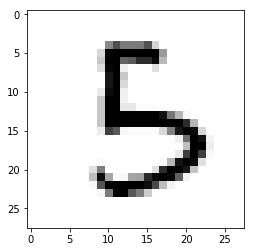

In [63]:
num = 970

print("Supuestamente es un {}".format(y[num]))

img = X[num].reshape(28, 28)
plt.imshow(img, cmap="Greys")


### División del dataset entre train y test

Dividimos el dataset entre train y test. Para eso usamos la siguiente función de `sklearn`

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1111999988)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7500, 784), (7500,), (2500, 784), (2500,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


Vamos a implementar esto.

Usualmente los clasificadores (siguiendo la interfaz de [sklearn](https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html) tienen dos métodos:

- `fit(X, y)` que ajusta("fittea") el modelo a los datos 
- `predict(X)`: dadas observaciones `X` predice sus etiquetas `y`

## Ejercicio

Implementar los métodos fit y predict de KNNClassifier. Tratar de vectorizar las operaciones en la medida de lo posible.

Pensar primero cómo calcular la distancia de un vector a todas las filas de una matriz `X`.

Pueden ser de ayuda las siguientes funciones:

- `np.linalg.norm`: devuelve el  
- `np.argsort`: devuelve los índices de un array ordenados de menor a mayor
- `np.bincount`:  dado un array de valores no-negativos, calcula cuántas veces vio a cada uno
- `np.argmax`: devuelve el índice cuyo valor es el más grande de un array

### Ejemplo de Broadcasting

¿Cómo puedo restarle un vector a todas las filas de una matriz? Respuesta: [broadcasting](https://docs.scipy.org/doc/numpy-1.15.0/user/basics.broadcasting.html)

In [ ]:
A = np.array([
    [1, 1, 1],
    [0, 1, 1],
    [0, 0, 1],
    [0, 0, 0]
])

x = np.array([1, 2, 1])

A-x

array([[ 0, -1,  0],
       [-1, -1,  0],
       [-1, -2,  0],
       [-1, -2, -1]])

## Calcular operaciones por filas y columnas

Muchas operaciones de Numpy (por ejemplo: calcular normas, sumas, etc) permiten ser ejecutadas por filas o columnas. Eso se suele controlar 

In [ ]:
import numpy as np
from IPython.core.debugger import set_trace


class KNNClassifier:
    def __init__(self, n_neighbors, order):
        self.n_neighbors = n_neighbors
        self.order = order
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def _distance_to_row(self, row):
        dist = np.linalg.norm(self.X-row, axis=1, ord=self.order)
        return dist
        
    def _predict_row(self, row):
        dist = self._distance_to_row(row)
        
        index = np.argsort(dist)
        closest = index[0:self.n_neighbors]
        
        neighbors = [self.y[i] for i in closest]
          
        count = np.bincount(neighbors)
        
        ret = np.argmax(count)
        
        
        return ret
    
    def predict(self, X, y=None):
        ret = np.zeros(X.shape[0])
        for k, row in enumerate(X):
            ret[k] = self._predict_row(row)
        return ret

Creamos el modelo y lo ajustamos a nuestros datos de entrenamiento

In [ ]:

clf = KNNClassifier(n_neighbors=11)

clf.fit(X_train, y_train)


Acá evaluamos cómo nos da el modelo. Esto lo hacemos midiendo la tasa de acierto de las predicciones de nuestro clasificador.

Para eso, primero predecimos `y_pred` y nos fijamos cuántas de esas mediciones dan igual que `y_test`



In [44]:
%%time

from sklearn.metrics import accuracy_score

# Pedimos que prediga los de test...

y_pred = clf.predict(X_test)

# Pedimos 
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(acc))

Accuracy: 0.9384
CPU times: user 1min 28s, sys: 1.98 s, total: 1min 30s
Wall time: 1min 30s


Deberían obtener una tasa de acierto > 90%...

Como vemos, se toma su tiempito. ¿Cómo podemos hacer para agilizar el proceso? 

Una solución es **reducir la dimensionalidad**, algo que veremos la próxima clase.



## Experimentando con los Parámetros

¿Qué pasa si cambiamos la cantidad de vecinos a observar en la votación (K)?

Agarremos un subconjunto pequeño de los datos de test 

**Observación**: Esto que estamos haciendo (ajustar un parámetro sobre el conjunto de test) no está bien, **está mal**. Pero a fines didácticos, nos sirve (o sea, está mal pero no tan mal)

A quienes les interese ahondar en este tema, pueden cursar Aprendizaje Automático o Reconocimiento de Patrones.

In [ ]:
X_dev, y_dev = X_test[:1000], y_test[:1000]

In [ ]:
scores = []
k_values = range(1, 15, 2) 

for k in k_values:
    """
    TODO: Entrenar un clasificador con k 
    
    Calcular el accuracy score para X_dev, y_dev
    """

    clf = KNNClassifier(n_neighbors=k)

    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_dev)
    
    acc = accuracy_score(y_dev, y_pred)
    print("k {} :  acc {}".format(k, acc))
    scores.append(acc)

k 1 :  acc 0.98
k 3 :  acc 0.94
k 5 :  acc 0.9533333333333334
k 7 :  acc 0.9466666666666667
k 9 :  acc 0.9266666666666666
k 11 :  acc 0.94
k 13 :  acc 0.94


## Extra:

Otras cosas que podemos probar

1. Cambiar la métrica (en vez de usar $l_2$, usar $l_1$, $l_\inf$. Con cuál funciona mejor? Ajustar el $k$ para cada una de las métricas

2. ¿Cómo cambia la performance si usamos menos instancias de entrenamiento? Correr un experimento a fin de verificar esto.

In [55]:
X_dev, y_dev = X_test[:1000], y_test[:1000]

clf_1 = KNNClassifier(n_neighbors=11, order=1)
clf_1.fit(X_train, y_train)

clf_inf = KNNClassifier(n_neighbors=11, order=np.inf)
clf_inf.fit(X_train, y_train)

y_pred_1 = clf_1.predict(X_dev)    
y_pred_inf = clf_inf.predict(X_dev)    
acc_1 = accuracy_score(y_dev, y_pred_1)
acc_inf = accuracy_score(y_dev, y_pred_inf)

print("k:  acc {}".format(acc_1))
print("k:  acc {}".format(acc_inf))

k:  acc 0.929
k:  acc 0.666
